In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

def majority_threshold(n):
  if n%2 == 0:
    return n/2
  else:
    return (n+1)/2

# Simulation (2b)

In [12]:
p = 0.3 # prob of doctors or students
n = 1 # num of doctors or students

def get_probability(number_of_jury, p):
  prob_maj = 0
  majority = majority_threshold(number_of_jury)
  for c in range(number_of_jury+1):
    prob = nCr(number_of_jury, c) * (pow(p, c) * pow((1 - p), (number_of_jury-c)))
    if c >= majority: # only sum when you reach the majority number of voters 
      prob_maj += prob
    #print('probability of majority', c, ':' , prob_maj, 'prob', prob)
  return prob_maj

print('Final probability value of majority:', get_probability(n, p))

Final probability value of majority: 0.3


# Plotting (2c)

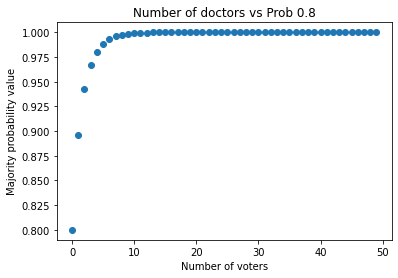

In [14]:
prob = []
p = 0.8
number_of_jury = 100
for i in range(1, number_of_jury+1, 2):
  #if i%2 == 0:
  prob.append(get_probability(i, p))
plt.scatter(range(50),prob)
plt.title('Number of doctors vs Prob 0.8')
plt.xlabel('Number of voters')
plt.ylabel('Majority probability value')
plt.show()

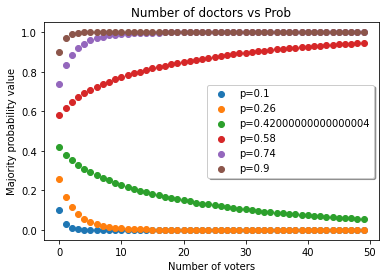

In [15]:
for p in np.linspace(0.1, 0.9, 6):
  prob = []
  number_of_jury = 100
  for i in range(1, number_of_jury+1, 2):
    prob.append(get_probability(i, p))
  
  plt.scatter(range(50),prob, label=f'p={p}')
  plt.title('Number of doctors vs Prob')
  plt.xlabel('Number of voters')
  plt.ylabel('Majority probability value')

plt.legend(shadow=True)
plt.show()

In [17]:
prob_array, numVoters_array = prob_majority(0, 1, 0.2, 100)
plt.plot(numVoters_array, prob_array)
plt.title('Number of students vs Prob 0.2')
plt.xlabel('Number of voters')
plt.ylabel('Majority probability value')
plt.show()

NameError: name 'prob_majority' is not defined

# Plotting (3a)

In [3]:
def classifier(p=0.8):
    return np.random.binomial(1, p, 1)[0]

In [2]:
def classifier_one_minus_one(p=0.8):
    if np.random.binomial(1, p, 1)[0] == 0:
        return -1
    return 1

In [4]:
def simulate(w_strong, w_weak, iter):
    simulations = []
    for _ in range(iter):
        predictions = []
        for _ in range(10):
            predictions.append(classifier(0.6)*w_weak)
        predictions.append(classifier(0.8)*w_strong)
        simulations.append(sum(predictions)>5)

    return sum(simulations)/iter

In [23]:
prob_simulated = []
for i in range(1,1000):
    prob_simulated.append(simulate(1, 1, i))

plt.plot(prob_simulated)
plt.title('Probability vs number of iterations')
plt.xlabel('Number of simulations')
plt.ylabel('Probability of being correct')
plt.show()

KeyboardInterrupt: 

In [ ]:
ps = []
weights = np.linspace(0, 11, 100)
for w in weights:
    weak = (11 - w) / 10
    ps.append( simulate(w, weak, 1000) )

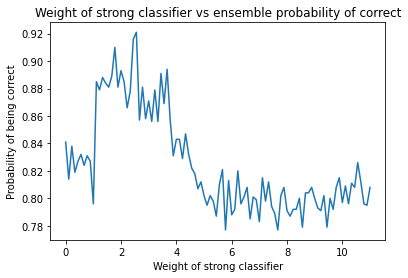

In [8]:
plt.plot(weights, ps)
plt.title('Weight of strong classifier vs ensemble probability of correct')
plt.xlabel('Weight of strong classifier')
plt.ylabel('Probability of being correct')
plt.show()

In [21]:
print(f'Best weight of strong classifier: {weights[np.argmax(ps)]}')
print(f'Best weight of weak classifiers: {(11 - weights[np.argmax(ps)]) / 10}')
print(f'Best probability: {max(ps)}')



Best weight of strong classifier: 2.5555555555555554
Best weight of weak classifiers: 0.8444444444444444
Best probability: 0.921


# 3C

In [4]:
N = 11
M = 15
weights = [1/N for x in range(N)]
num_samples = 1000
for m in range(M):
    predictions = []
    for i in range(10):
        predictions.append(classifier_one_minus_one(0.6)*weights[i])
    predictions.append(classifier_one_minus_one(0.8)*weights[-1])

    error = 0    
    for x in range(N):
        error += (weights[x]*1 if predictions[x]<0 else 0)
    error = error / sum(weights)

    alpha = ( np.log((1-error)/error) if error > 0 else 0)

    for y in range(N):
        weights[y] = weights[y] * np.exp( alpha * (1 if predictions[y]<0 else -1) )
    
    weights = weights / sum(weights)


print(weights)
sim_trails = 1000
simulations = []
predictions = []
for _ in range(sim_trails):
    for i in range(10):
        predictions.append(classifier_one_minus_one(0.6)*weights[i])
    predictions.append(classifier_one_minus_one(0.8)*weights[-1])
    simulations.append(sum(predictions)>5)

print(sum(simulations)/sim_trails)


[7.67314472e-10 1.73696899e-04 4.98211608e-10 2.41655194e-03
 2.44167225e-07 9.74056442e-01 1.44887109e-05 1.21782376e-05
 1.07219304e-08 2.33263865e-02 1.59917277e-11]
0.98


In [63]:
# num_classifiers = 11
# weights = [1/num_classifiers for x in range(num_classifiers)]
# boosting_rounds = 1000
# d_w = [weights for x in range(boosting_rounds)]
# weights
# iterations = 1000
# alphas = []
# for _ in range(1,iterations):
#     simulations = []
#     predictions = []
#     for j in range(10):
#         predictions.append(classifier(0.6)*d_w[-1][j])
    
#     predictions.append(classifier(0.8)*d_w[-1][10])
#     simulations.append(sum(predictions)>5)

#     # compute weights
#     for t in range(1, boosting_rounds):
#         errors = 0
#         for x in range(num_classifiers):
#             if predictions[x] < 0.5: # error
#                 errors += (d_w[t][x]*predictions[x])
#         error_rate = errors / sum(d_w[t])
#         if error_rate > 0:
#             alpha = np.log((1-error_rate)/(error_rate))
#         else: 
#             alpha = 0

#         alphas.append(alpha)

#         if alpha > 0.5:
#             alpha = alphas[max(0, t-1)]
#         for i in range(num_classifiers):
#             weights[i] *= np.exp(-alpha*(1 if predictions[i]>0.5 else -1)) 

# print(sum(simulations)/iterations)

C:\Users\Pedro\AppData\Local\Temp\ipykernel_15272\1720735252.py:22: RuntimeWarning: overflow encountered in double_scalars
  error_rate = errors / sum(weights)
C:\Users\Pedro\AppData\Local\Temp\ipykernel_15272\1720735252.py:14: RuntimeWarning: overflow encountered in double_scalars
  simulations.append(sum(predictions)>5)


0.998


In [62]:
weights

[2.7898587444425725e+102,
 2.7898587444425725e+102,
 2.7898587444425725e+102,
 2.7898587444425725e+102,
 2.7898587444425725e+102,
 2.7898587444425725e+102,
 2.7898587444425725e+102,
 2.7898587444425725e+102,
 2.7898587444425725e+102,
 2.7898587444425725e+102,
 2.7898587444425725e+102]